In [121]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [2]:
def project(vector, matrix):
    return vector @ matrix

In [95]:
def greedy(vectors, error):
    list_approx_base = np.empty((vectors[0].size,))
    approx_error = 1e10
    
    while approx_error > error and vectors.shape[0] > 0:
        best_vec = vectors[0]
        best_idx = 0
        
        for idx, projector in enumerate(vectors):
            temp_new_base = np.copy(list_approx_base)
            temp_new_base = np.vstack((temp_new_base, projector))
            temp_error = npl.norm(np.outer(vector @ temp_new_base, 
                                           temp_new_base))
            if temp_error < approx_error:
                approx_error = temp_error
                best_idx = idx
                best_vec = projector
        
        list_approx_base = np.vstack((list_approx_base, vector[idx]))
    
    return list_approx_base

In [120]:
base = np.random.random((5, 5)) * 2 - 1
vectors = np.random.random((30, 5)) * 2 - 1

projection = base @ vectors.T
projection.shape

(5, 30)

[[1 1]]
[[ 0.16669779  0.57909474]
 [ 0.93527914  0.32960477]
 [-0.25570632  0.25937669]
 [ 0.32290061  0.72211104]
 [ 0.51364211  0.82542281]
 [-0.8655638   0.02098009]
 [ 0.77339508  0.94487836]
 [ 0.1023743   0.6956972 ]
 [ 0.42082455 -0.08638267]
 [ 0.20367057  0.23072632]]
[[ 0.74579253  1.2648839   0.00367036  1.04501165  1.33906492 -0.84458371
   1.71827345  0.7980715   0.33444188  0.43439689]]
[[ 0.16669779  0.57909474]
 [ 0.93527914  0.32960477]
 [-0.25570632  0.25937669]
 [ 0.32290061  0.72211104]
 [ 0.51364211  0.82542281]
 [-0.8655638   0.02098009]
 [ 0.77339508  0.94487836]
 [ 0.1023743   0.6956972 ]
 [ 0.42082455 -0.08638267]
 [ 0.20367057  0.23072632]]
(1, 10)
[[ 0.74579253  1.2648839   0.00367036  1.04501165  1.33906492 -0.84458371
   1.71827345  0.7980715   0.33444188  0.43439689]]


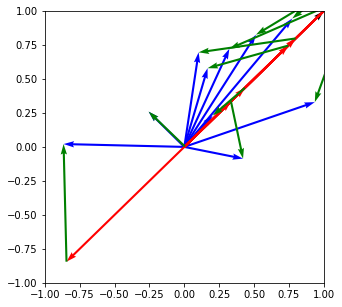

In [123]:
base = np.array([[1,1]])

vectors = np.random.random((10,2)) * 2 - 1
print(base)
print(vectors)

print(base @ vectors.T)

kwargs = {'angles':'xy', 'scale_units':'xy', 'scale':1}

origin = [0], [0] # origin point

vec = vectors
print(vec)

plt.figure(figsize=(5,5))
## BASE
plt.quiver(*origin, base[:, 0], base[:, 1], **kwargs)
## VECTORS
plt.quiver(*origin, vec[:,0], vec[:,1], color=['b'], **kwargs)
## PROJ
temp = base @ vec.T
print(temp.shape)
print(temp)
proj = np.outer(base @ vec.T, base)
# print(proj)
plt.quiver(*origin, proj[:,0], proj[:,1], color=['r'], **kwargs)
antiproj = vec- proj
# print(antiproj)
plt.quiver(proj[:,0], proj[:,1], antiproj[:,0], antiproj[:,1], color=['g'], **kwargs)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()